In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.tree import *
from sklearn.metrics import r2_score, matthews_corrcoef
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [2]:
df_atom=pd.read_csv('caco_AtomPair.tsv', sep='\t', index_col=False)
df_atom.head()

,Molecule,AP_FP_2,AP_FP_3,AP_FP_4,AP_FP_5,AP_FP_6,AP_FP_460,AP_FP_1700,AP_FP_480,AP_FP_8,...,AP_FP_1787,AP_FP_2233,AP_FP_1542,AP_FP_3736,AP_FP_2696,AP_FP_130,AP_FP_4243,AP_FP_4314,AP_FP_4050,AP_FP_6622
0,Compound0001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Compound0002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Compound0003,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,3,0,0
3,Compound0004,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,3,0,0
4,Compound0005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


In [3]:
df_dragon=pd.read_csv('caco_Dragon.tsv', sep='\t', index_col=False)
df_dragon
list(df_dragon)

['Molecule',
 'ClogP',
 'QikProp_.stars',
 'QikProp_.amine',
 'QikProp_.amidine',
 'QikProp_.acid',
 'QikProp_.amide',
 'QikProp_.rotor',
 'QikProp_.rtvFG',
 'QikProp_CNS',
 'QikProp_mol_MW',
 'QikProp_dipole',
 'QikProp_SASA',
 'QikProp_FOSA',
 'QikProp_FISA',
 'QikProp_PISA',
 'QikProp_WPSA',
 'QikProp_volume',
 'QikProp_donorHB',
 'QikProp_accptHB',
 'QikProp_dip.2.V',
 'QikProp_ACxDN..5.SA',
 'QikProp_glob',
 'QikProp_QPpolrz',
 'QikProp_QPlogPC16',
 'QikProp_QPlogPoct',
 'QikProp_QPlogPw',
 'QikProp_QPlogPo.w',
 'QikProp_QPlogS',
 'QikProp_CIQPlogS',
 'QikProp_QPlogHERG',
 'QikProp_QPPCaco',
 'QikProp_QPlogBB',
 'QikProp_QPPMDCK',
 'QikProp_QPlogKp',
 'QikProp_IP.eV.',
 'QikProp_EA.eV.',
 'QikProp_.metab',
 'QikProp_QPlogKhsa',
 'QikProp_HumanOralAbsorption',
 'QikProp_PercentHumanOralAbsorption',
 'QikProp_SAfluorine',
 'QikProp_SAamideO',
 'QikProp_PSA',
 'QikProp_.NandO',
 'QikProp_RuleOfFive',
 'QikProp_.ringatoms',
 'QikProp_.in34',
 'QikProp_.in56',
 'QikProp_.noncon',
 'Qik

In [4]:
df_quick=pd.read_csv('caco_QuickProp.tsv', sep='\t', index_col=False)
list(df_quick)

['Molecule',
 'QikProp_.stars',
 'QikProp_.amine',
 'QikProp_.amidine',
 'QikProp_.acid',
 'QikProp_.amide',
 'QikProp_.rotor',
 'QikProp_.rtvFG',
 'QikProp_CNS',
 'QikProp_mol_MW',
 'QikProp_dipole',
 'QikProp_SASA',
 'QikProp_FOSA',
 'QikProp_FISA',
 'QikProp_PISA',
 'QikProp_WPSA',
 'QikProp_volume',
 'QikProp_donorHB',
 'QikProp_accptHB',
 'QikProp_dip.2.V',
 'QikProp_ACxDN..5.SA',
 'QikProp_glob',
 'QikProp_QPpolrz',
 'QikProp_QPlogPC16',
 'QikProp_QPlogPoct',
 'QikProp_QPlogPw',
 'QikProp_QPlogPo.w',
 'QikProp_QPlogS',
 'QikProp_CIQPlogS',
 'QikProp_QPlogHERG',
 'QikProp_QPPCaco',
 'QikProp_QPlogBB',
 'QikProp_QPPMDCK',
 'QikProp_QPlogKp',
 'QikProp_IP.eV.',
 'QikProp_EA.eV.',
 'QikProp_.metab',
 'QikProp_QPlogKhsa',
 'QikProp_HumanOralAbsorption',
 'QikProp_PercentHumanOralAbsorption',
 'QikProp_SAfluorine',
 'QikProp_SAamideO',
 'QikProp_PSA',
 'QikProp_.NandO',
 'QikProp_RuleOfFive',
 'QikProp_.ringatoms',
 'QikProp_.in34',
 'QikProp_.in56',
 'QikProp_.noncon',
 'QikProp_.nonH

In [5]:
df_pipe_FP=pd.read_csv('caco_PipelinePilot_FP.tsv', sep='\t', index_col=False)
list(df_pipe_FP)

['Molecule',
 'PPFP_FCFP_0001',
 'PPFP_FCFP_0002',
 'PPFP_FCFP_0003',
 'PPFP_FCFP_0004',
 'PPFP_FCFP_0005',
 'PPFP_FCFP_0006',
 'PPFP_FCFP_0007',
 'PPFP_FCFP_0008',
 'PPFP_FCFP_0009',
 'PPFP_FCFP_0010',
 'PPFP_FCFP_0011',
 'PPFP_FCFP_0012',
 'PPFP_FCFP_0013',
 'PPFP_FCFP_0014',
 'PPFP_FCFP_0015',
 'PPFP_FCFP_0016',
 'PPFP_FCFP_0017',
 'PPFP_FCFP_0018',
 'PPFP_FCFP_0019',
 'PPFP_FCFP_0020',
 'PPFP_FCFP_0021',
 'PPFP_FCFP_0022',
 'PPFP_FCFP_0023',
 'PPFP_FCFP_0024',
 'PPFP_FCFP_0025',
 'PPFP_FCFP_0026',
 'PPFP_FCFP_0027',
 'PPFP_FCFP_0028',
 'PPFP_FCFP_0029',
 'PPFP_FCFP_0030',
 'PPFP_FCFP_0031',
 'PPFP_FCFP_0032',
 'PPFP_FCFP_0033',
 'PPFP_FCFP_0034',
 'PPFP_FCFP_0035',
 'PPFP_FCFP_0036',
 'PPFP_FCFP_0037',
 'PPFP_FCFP_0038',
 'PPFP_FCFP_0039',
 'PPFP_FCFP_0040',
 'PPFP_FCFP_0041',
 'PPFP_FCFP_0042',
 'PPFP_FCFP_0043',
 'PPFP_FCFP_0044',
 'PPFP_FCFP_0045',
 'PPFP_FCFP_0046',
 'PPFP_FCFP_0047',
 'PPFP_FCFP_0048',
 'PPFP_FCFP_0049',
 'PPFP_FCFP_0050',
 'PPFP_FCFP_0051',
 'PPFP_FCFP_0052',

In [6]:
df_out=pd.read_csv('caco_Outcome.tsv', sep='\t', index_col=False)
list(df_out)

['Molecule', 'Class']

In [7]:
df_out.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [8]:
x_df=df_dragon

In [9]:
#x_df.drop(x_df.columns[[1]], axis=1)
#x_df
x_df.set_index('Molecule', inplace=True)
x_df.shape

(3796, 52)

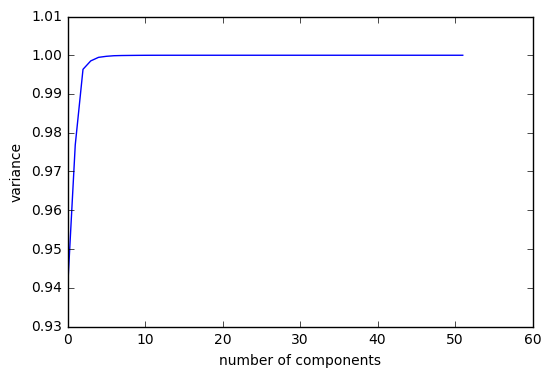

In [10]:
from sklearn.decomposition import PCA
pca=PCA().fit(x_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("variance")
plt.show()


In [11]:
pca=PCA(n_components=5)
x_pca=pca.fit_transform(x_df)

In [12]:
y_df=df_out
y_df.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [13]:
y_final=y_df.drop('Molecule', axis=1)
y_final.head()


,Class
0,M
1,L
2,M
3,M
4,M


In [14]:
x_train_df, x_test_df, y_train_df, y_test_df=train_test_split(x_pca, y_final, test_size=0.2)
#x_train_int=table.Columns.RemoveAt(0)

In [15]:
x_scaler=StandardScaler()
clf_model=x_scaler.fit(x_train_df)
x_train_norm=clf_model.transform(x_train_df)
x_test_norm=clf_model.transform(x_test_df)
x_train_norm.shape, x_test_norm.shape

((3036, 5), (760, 5))

In [16]:
y_encoder=LabelEncoder()
y_encoded_tr=y_encoder.fit_transform(y_train_df)
y_enc_tr=np_utils.to_categorical(y_encoded_tr)
y_enc_tr.shape
y_encoded_test=y_encoder.fit_transform(y_test_df)
y_enc_test=np_utils.to_categorical(y_encoded_test)
y_enc_tr.shape,y_enc_test.shape

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((3036, 3), (760, 3))

In [17]:
y_enc_tr.shape[0], y_enc_tr.shape[1]

(3036, 3)

In [18]:
y_scaler=StandardScaler()
y_train_norm=y_scaler.fit_transform(y_enc_tr)
y_test_norm=y_scaler.transform(y_enc_test)
y_train_norm.shape

(3036, 3)

**NEURAL NETWORK**

In [19]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

In [20]:
seed=7
np.random.seed(seed)

In [21]:
def baseline_model():
    model=Sequential()
    model.add(Dense(5, input_dim=5,init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(75, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(25, init='normal', activation='relu'))
    #model.add(Dropout(0.2))   
    #model.add(Dense(12, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(3, init='normal', activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
#fit and evaluate the model
estimators=[]
#estimators.append(('standardise',StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, nb_epoch=100, batch_size=200, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, x_train_norm, y_train_norm, cv=kfold)
print('accuracy:', results.mean()*100)

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", input_dim=5, activation="relu")`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="normal", activation="sigmoid")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", input_dim=5, activation="relu")`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="normal", acti

accuracy: 47.0424046153


In [24]:
x_train_norm.shape, x_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((3036, 5), (760, 5), (3036, 3), (760, 3))

In [25]:
y_train_final, y_test_final=train_test_split(y_final, test_size=0.2)
y_train_final.shape

(3036, 1)

In [26]:
from sklearn import linear_model
clf_linear=linear_model.LogisticRegression()
model_linear=clf_linear.fit(x_train_norm, y_train_final)
acc_logit=model_linear.score(x_test_norm, y_test_final)
print('accuracy:',acc_logit)

accuracy: 0.539473684211


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
tree_c=DecisionTreeClassifier(random_state=seed)#check this
model_c=tree_c.fit(x_train_norm, y_train_final)
acc_clf=model_c.score(x_test_norm, y_test_final)
print('accuracy:', acc_clf )

accuracy: 0.492105263158


In [28]:
export_graphviz(tree_c, out_file='tree_clf.dot', rounded=True)#visualizing the decision tree

In [29]:
clf_SGD=linear_model.SGDClassifier(loss='epsilon_insensitive', penalty='none', alpha=0.0001)
clf_SGD.fit(x_train_norm, y_train_final)
y_predict_SGD=clf_SGD.predict(x_test_norm)
acc_SGD=clf_SGD.score(x_test_norm, y_test_final)
print('accuracy of SGD:', acc_SGD)

accuracy of SGD: 0.315789473684


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.svm import SVC
clf_svc=SVC(kernel='rbf', C=1e3)
clf_svc.fit(x_train_norm, y_train_final)
y_predict_svc=clf_svc.predict(x_test_norm)
acc_svc=clf_svc.score(x_test_norm, y_test_final)
print("accuracy of svc:", acc_svc)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of svc: 0.519736842105


In [33]:
rf=RandomForestClassifier()
rf.fit(x_train_norm, y_train_final)
rf_predict_norm=rf.predict(x_test_norm)
acc_rf=rf.score(x_test_norm, y_test_final)
print('accuracy of randomforest:', acc_rf)

accuracy of randomforest: 0.494736842105


C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


**Binary class modelling**

In [34]:
#list(df_dragon), list(df_out)

In [35]:
df_dragon_mrg=pd.merge(df_quick, df_out)

In [36]:
#df_dragon_mrg

In [37]:
#HM model
a=df_dragon_mrg[df_out['Class']=='H']
b=df_dragon_mrg[df_out['Class']=='M']
frames_hm=[a, b]
HM=pd.concat(frames_hm)

In [38]:
#list(HM)

In [39]:
#ML model
c=df_dragon_mrg[df_out['Class']=='M']
d=df_dragon_mrg[df_out['Class']=='L']
frames_ml=[c,d]
ML=pd.concat(frames_ml)

In [40]:
ML.shape

(2406, 53)

In [62]:
x_ML=ML.values[:, 1:51]
x_ML

array([[5, 0, 0, ..., 0, 9, 0],
       [0, 2, 0, ..., 7, 38, 1],
       [0, 2, 0, ..., 8, 39, 1],
       ..., 
       [19, 1, 1, ..., 4, 72, 2],
       [0, 0, 0, ..., 4, 19, 0],
       [0, 1, 0, ..., 4, 24, 0]], dtype=object)

In [64]:
y_ML=ML.values[:, 52]
y_ML

array(['M', 'M', 'M', ..., 'L', 'L', 'L'], dtype=object)

In [65]:
ML_x_train, ML_x_test, ML_y_train, ML_y_test = train_test_split(x_ML, y_ML, test_size=0.2)

In [41]:
#HL model
e=df_dragon_mrg[df_out['Class']=='H']
f=df_dragon_mrg[df_out['Class']=='L']
frames_hl=[e,f]
HL=pd.concat(frames_hl)

In [42]:
HL.shape

(1767, 53)

In [71]:
x_HL=HL.values[:,1:51]
y_HL=HL.values[:, 52]

In [72]:
HL_x_train, HL_x_test, HL_y_train, HL_y_test=train_test_split(x_HL, y_HL, test_size=0.2)

In [73]:
x_HM=HM.values[:, 1:51].astype('float32')
print(x_HM)

[[  2.   0.   0. ...,   0.  11.   0.]
 [  0.   0.   0. ...,   0.  11.   0.]
 [  1.   1.   0. ...,   9.  41.   0.]
 ..., 
 [  0.   0.   0. ...,   7.  23.   0.]
 [  0.   1.   0. ...,   5.  28.   0.]
 [  0.   1.   0. ...,   2.  21.   0.]]


In [74]:
y_HM=HM.values[:, 52]
y_HM

array(['H', 'H', 'H', ..., 'M', 'M', 'M'], dtype=object)

In [75]:
HM_x_train, HM_x_test, HM_y_train, HM_y_test=train_test_split(x_HM,y_HM, test_size=0.2)

In [76]:
HM_x_train.shape

(2735, 50)

** Decision tree model for HM class**

In [77]:
tree_hm=DecisionTreeClassifier(min_weight_fraction_leaf=0.13, max_leaf_nodes=12)
tree_hm.fit(HM_x_train, HM_y_train)
acc_hm=tree_hm.score(HM_x_test, HM_y_test)

print(tree_hm.classes_)
print(tree_hm.predict_proba(HM_x_test))
print('accuracy for HM model:',acc_hm)

['H' 'M']
[[ 0.18093385  0.81906615]
 [ 0.6547619   0.3452381 ]
 [ 0.0104712   0.9895288 ]
 ..., 
 [ 0.18093385  0.81906615]
 [ 0.96606335  0.03393665]
 [ 0.12078652  0.87921348]]
accuracy for HM model: 0.818713450292


**Chiad tree model**

In [78]:
from CHAID import Tree

#CHAID input parameters
indep_variable_cols=['Molecule','QikProp_.stars','QikProp_.amine','QikProp_.amidine','QikProp_.acid',
 'QikProp_.amide','QikProp_.rotor','QikProp_.rtvFG','QikProp_CNS','QikProp_mol_MW','QikProp_dipole','QikProp_SASA','QikProp_FOSA',
 'QikProp_FISA','QikProp_PISA','QikProp_WPSA', 'QikProp_volume','QikProp_donorHB','QikProp_accptHB','QikProp_dip.2.V','QikProp_ACxDN..5.SA',
 'QikProp_glob','QikProp_QPpolrz','QikProp_QPlogPC16','QikProp_QPlogPoct','QikProp_QPlogPw','QikProp_QPlogPo.w',
'QikProp_QPlogS','QikProp_CIQPlogS','QikProp_QPlogHERG','QikProp_QPPCaco','QikProp_QPlogBB','QikProp_QPPMDCK','QikProp_QPlogKp',
 'QikProp_IP.eV.','QikProp_EA.eV.','QikProp_.metab','QikProp_QPlogKhsa','QikProp_HumanOralAbsorption','QikProp_PercentHumanOralAbsorption','QikProp_SAfluorine',
 'QikProp_SAamideO','QikProp_PSA', 'QikProp_.NandO','QikProp_RuleOfFive','QikProp_.ringatoms','QikProp_.in34','QikProp_.in56','QikProp_.noncon',
 'QikProp_.nonHatm','QikProp_RuleOfThree','QikProp_ACxDN..5.SAxSASA.MW']
dep_variable=["Class"]

In [79]:
#zip(indep_variable_cols,['nominal']*3)

In [80]:
#tree from pandas
tree_chaid= Tree.from_pandas_df(HM, dict(zip(indep_variable_cols, ['nominal']*3)), dep_variable, 
                          max_depth=4, min_parent_node_size=80, min_child_node_size=35)
#tree.to_tree

**Random Forest classifier for HM**

In [81]:
RF_hm=RandomForestClassifier(n_estimators=95, random_state=1)
RF_hm.fit(HM_x_train, HM_y_train)
RF_hm_predict= RF_hm.predict(HM_x_test)
acc_RF_HM=RF_hm.score(HM_x_test, HM_y_test)

print(RF_hm.classes_)
print(RF_hm.predict_proba(HM_x_test))
print('accuracy of Random forest for HM model is:', acc_RF_HM)


#matthews correlation coefficient
matt_corr=matthews_corrcoef(HM_y_test, RF_hm_predict)
print('mcc:',matt_corr)

RF_hm.get_params

['H' 'M']
[[ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]
accuracy of Random forest for HM model is: 0.963450292398
mcc: 0.921785168286


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=95, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)>

**Decision tree classifier for ML**

In [100]:
tree_ml=DecisionTreeClassifier(min_weight_fraction_leaf=0.05, max_leaf_nodes=10)
tree_ml.fit(ML_x_train, ML_y_train)
acc_tree_ml=tree_ml.score(ML_x_test, ML_y_test)
pre_tree_ml=tree_ml.predict_proba(ML_x_test)

print('order of classes:',tree_ml.classes_)
print(tree_ml.get_params)
print('accuracy for the CT for ML model:', acc_tree_ml)
print('probability predictions for ML model:', pre_tree_ml)
#len(acc_tree_ml),len(ML_x_test)

order of classes: ['L' 'M']
<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.05, presort=False,
            random_state=None, splitter='best')>
accuracy for the CT for ML model: 0.933609958506
probability predictions for ML model: [[ 0.01010101  0.98989899]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.75675676  0.24324324]
 [ 0.07246377  0.92753623]
 [ 0.11976048  0.88023952]
 [ 0.          1.        ]
 [ 0.29245283  0.70754717]
 [ 0.37735849  0.62264151]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.07246377  0.92753623]
 [ 0.75675676  0.24324324]
 [ 0.07246377  0.92753623]
 [ 0.75675676  0.24324324]
 [ 0.11976048  0.88023952]
 [ 0.          1.        ]
 [ 0.02877698  0.9

**Random Forest Classifier for ML**

In [102]:
RF_ml=RandomForestClassifier(n_estimators=23, random_state=2)
RF_ml.fit(ML_x_train, ML_y_train)
accu_RF_ml=RF_ml.score(ML_x_test, ML_y_test)
pre_RF_ml=RF_ml.predict_proba(ML_x_test)

print('order of classes:',RF_ml.classes_)
print('accuracy of model:', accu_RF_ml)
print('probabilities of the respective classes:', pre_RF_ml)
print(RF_ml.get_params)

order of classes: ['L' 'M']
accuracy of model: 0.9377593361
probabilities of the respective classes: [[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.08695652  0.91304348]
 [ 0.04347826  0.95652174]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.34782609  0.65217391]
 [ 0.08695652  0.91304348]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.26086957  0.73913043]
 [ 0.13043478  0.86956522]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.43478261  0.56521739]
 [ 0.08695652  0.91304348]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.   

**Decision Tree for the LH model**

In [113]:
tree_LH=DecisionTreeClassifier(min_weight_fraction_leaf=0.05, max_leaf_nodes=10)
tree_LH.fit(HL_x_train, HL_y_train)
acc_tree_LH=tree_LH.score(HL_x_test, HL_y_test)
predict_tree_LH=tree_LH.predict(HL_x_test)
prob_tree_LH=tree_LH.predict_proba(HL_x_test)

print('order of classes:', tree_LH.classes_)
print("accuracy of the model", acc_tree_LH)
print('probabilities of the classes:', prob_tree_LH)
print('prediction of classes:', predict_tree_LH)

tree_LH.get_params

order of classes: ['H' 'L']
accuracy of the model 0.949152542373
probabilities of the classes: [[ 0.75        0.25      ]
 [ 0.98347107  0.01652893]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.75        0.25      ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.75        0.25      ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 0.85393258  0.14606742]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.85393258 

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.05, presort=False,
            random_state=None, splitter='best')>

**Random Forest for LH model**

In [121]:
RF_LH=RandomForestClassifier(n_estimators=47, random_state=3)
RF_LH.fit(HL_x_train, HL_y_train)
acc_RF_HL=RF_LH.score(HL_x_test, HL_y_test)
predict_RF_HL=RF_LH.predict(HL_x_test)
pro_RF_HL=RF_LH.predict_proba(HL_x_test)

print('order of classes:', RF_LH.classes_)
print('accuracy of model:', acc_RF_HL)
print('probabilities of the respective classes:', pro_RF_HL)
print('predictions of the model:', predict_RF_HL )

order of classes: ['H' 'L']
accuracy of model: 0.977401129944
probabilities of the respective classes: [[ 0.93617021  0.06382979]
 [ 0.93617021  0.06382979]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.95744681  0.04255319]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 0.9787234   0.0212766 ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.70212766  0.29787234]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.17375887  0.82624113]
 [ 0.59574468  0.40425532]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1. 